In [1]:
import numpy as np
import cv2

* **Para imágenes con guantes verdes**

In [2]:
g_amarillo=cv2.imread('T_G_Trabajando_Mano-Amarillo_14_double_box2.jpg')
gt_amarillo=g_amarillo.copy()
gt_amarillo[:,:,[2,1,0]]=g_amarillo #cv2 lee en orden BGR'
print('dimensiones de la imagen: ', gt_amarillo.shape, 'es decir: ', gt_amarillo.shape[0],'x',gt_amarillo.shape[1],' pixeles RGB')
print('tipo de datos: ', gt_amarillo.dtype)
cv2.imshow('pulse una tecla aqui para seguir',g_amarillo)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

dimensiones de la imagen:  (133, 191, 3) es decir:  133 x 191  pixeles RGB
tipo de datos:  uint8


In [3]:
import matplotlib.pyplot as plt

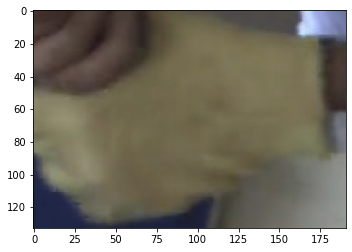

In [4]:
plt.imshow(gt_amarillo)
plt.show()

In [6]:
# Pasamos a data frame los píxeles con sus componentes
dims=gt_amarillo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=gt_amarillo[f,c,:]
        
import pandas as pd
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (25403, 4)


,pixel_id,rojo,verde,azul
0,0,71,56,51
1,1,69,54,49
2,2,68,53,48
3,3,67,52,47
4,4,68,50,46


In [7]:
#Hacemos un análisis general de los datos obtenidos
df.describe()

,pixel_id,rojo,verde,azul
count,25403.00000,25403.000000,25403.000000,25403.000000
mean,12701.00000,102.669212,96.965988,81.183600
std,7333.35878,26.786380,27.780656,25.989782
min,0.00000,25.000000,24.000000,23.000000
25%,6350.50000,87.000000,80.000000,70.000000
50%,12701.00000,110.000000,103.000000,78.000000
75%,19051.50000,120.000000,114.000000,87.000000
max,25402.00000,208.000000,228.000000,255.000000


En esta imágen tenemos 25402 píxeles

In [ ]:
#Veamos en qué rango se encuentran el valor de esos píxeles


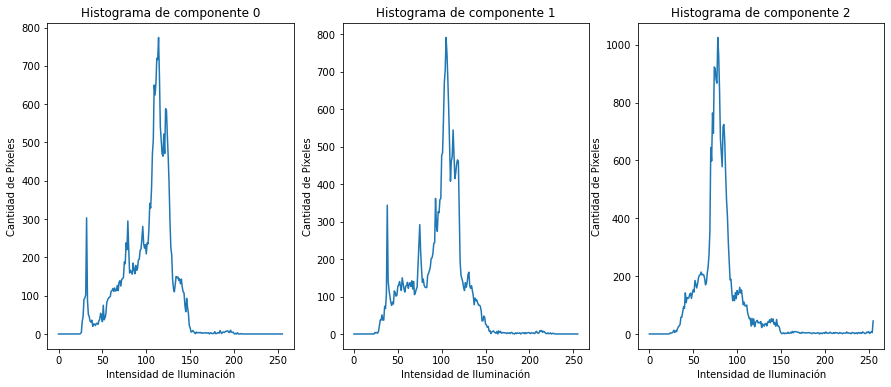

In [18]:
#Veamos su histograma
plt.figure(figsize=[15,6])

hist = cv2.calcHist([gt_amarillo],[0],None,[256],[0,256])
hist1 = cv2.calcHist([gt_amarillo],[1],None,[256],[0,256])
hist2 = cv2.calcHist([gt_amarillo],[2],None,[256],[0,256])

plt.subplot(1,3,1), plt. plot(hist),plt.title("Histograma de componente 0")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.subplot(1,3,2), plt. plot(hist1),plt.title("Histograma de componente 1")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.subplot(1,3,3), plt. plot(hist2),plt.title("Histograma de componente 2")

plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.show()

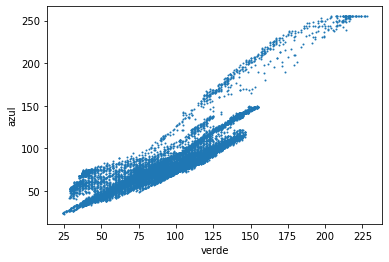

In [19]:
import matplotlib.patches as mpatches

variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

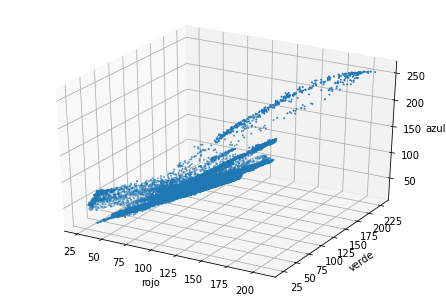

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()


Podemos ver que nuestra imágen no es del todo gris, tiene componentes rojo verde y azul como era de esperar

In [121]:
#Ahora etiquetamos nuestro guante amarillo

showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_amarillo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (18, 67, 91, 38)
(columna, fila, anchocol, anchofila)


In [122]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_amarillo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (4, 5, 59, 22)
(columna, fila, anchocol, anchofila)


In [123]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_amarillo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (94, 123, 92, 10)
(columna, fila, anchocol, anchofila)


In [124]:
rois=[roi1,roi2,roi3]

In [125]:
import numpy as np
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=gt_amarillo[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

import pandas as pd
df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()

5676
(5676, 5)
Base de pixeles etiquetados:


,pixel_id,rojo,verde,azul,etiqueta
0,12815,150,145,115,1
1,12816,150,145,115,1
2,12817,150,145,115,1
3,12818,150,145,115,1
4,12819,150,145,113,1


cantidad de muestras etiquetadas: 5676
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


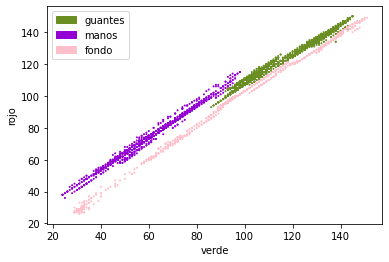

In [126]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
        
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='guantes')
patch2 = mpatches.Patch(color=colores[1], label='manos')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

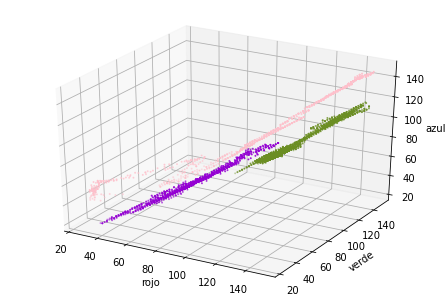

In [127]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0    71     56    51         0
1         1    69     54    49         0
2         2    68     53    48         0
3         3    67     52    47         0
4         4    68     50    46         0
19727
25403
proporción de datos etiqueados: 0.22343817659331575


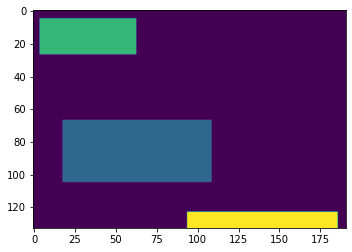

In [128]:
a=gt_amarillo.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)


In [132]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 1.00


(133, 191, 3)
[3]


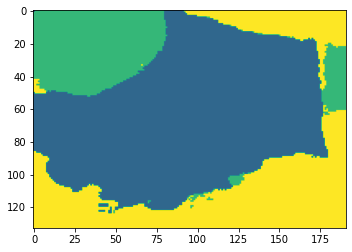

In [133]:
a=gt_amarillo.shape

print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([gt_amarillo[i,j,:]])        

clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
        

In [134]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)   

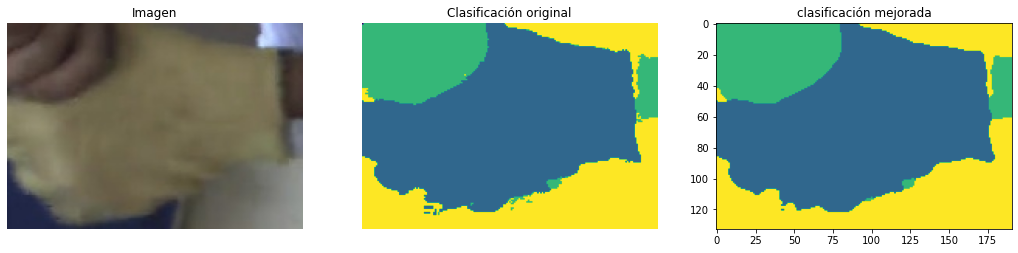

In [135]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(gt_amarillo)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

Se observa que hay overfitting

In [136]:
#Asignación progresiva
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 6
#data_rgb=data[:,1:4]
knn6 = KNeighborsClassifier(n_neighbors)
knn6.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn6.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 1.00


13
proporción de datos sin etiquetar: [0.0005117505806400819]


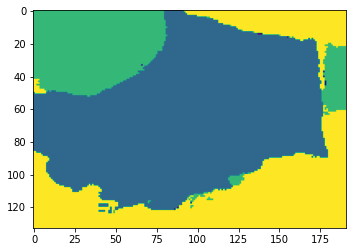

In [137]:
##loop 1
prop=[]
r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print(sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)
        

de datos sin etiquetar: 0
proporción de datos sin etiquetar: [0.0005117505806400819, 0.0]


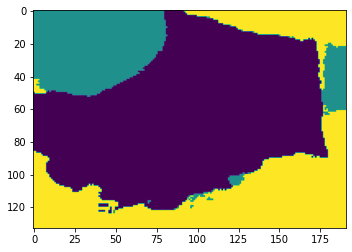

In [138]:
##loop 2
data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
target=df_completo.etiqueta[df_completo.etiqueta!=0]
knn.fit(data_rgb, target)
knn6.fit(data_rgb, target)

r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)

Resulta mejor la mejora por medio de la moda. Esto puede ser debido a que nuestro modelo de k vecinos sobreajusta al conjunto de entrenamiento, sea cual fuere la cantidad de 'k'. Por lo tanto la diferencia en sus predicciones es muy pequeña.

* **Ahora para imágenes con guantes verdes**

In [140]:
g_verde=cv2.imread('T_G_Trabajando_Mano-Verde_86_double_box1.jpg')
gt_verde=g_verde.copy()
gt_verde[:,:,[2,1,0]]=g_verde #cv2 lee en orden BGR'
print('dimensiones de la imagen: ', gt_verde.shape, 'es decir: ', gt_verde.shape[0],'x',gt_verde.shape[1],' pixeles RGB')
print('tipo de datos: ', gt_verde.dtype)
cv2.imshow('pulse una tecla aqui para seguir',g_verde)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

dimensiones de la imagen:  (250, 220, 3) es decir:  250 x 220  pixeles RGB
tipo de datos:  uint8


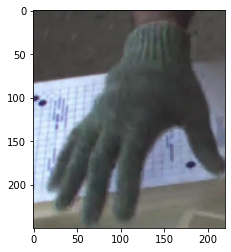

In [142]:
plt.imshow(gt_verde)
plt.show()

In [143]:
dims=gt_verde.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=gt_verde[f,c,:]
        
import pandas as pd
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (55000, 4)


,pixel_id,rojo,verde,azul
0,0,74,72,73
1,1,72,70,71
2,2,70,69,67
3,3,68,67,65
4,4,66,65,63


In [144]:
df.describe()

,pixel_id,rojo,verde,azul
count,55000.00000,55000.000000,55000.000000,55000.000000
mean,27499.50000,97.090691,101.302000,105.236109
std,15877.27674,44.951672,49.755497,59.300358
min,0.00000,28.000000,26.000000,32.000000
25%,13749.75000,66.000000,67.000000,65.000000
50%,27499.50000,78.000000,81.000000,81.000000
75%,41249.25000,119.000000,119.000000,119.000000
max,54999.00000,225.000000,246.000000,255.000000


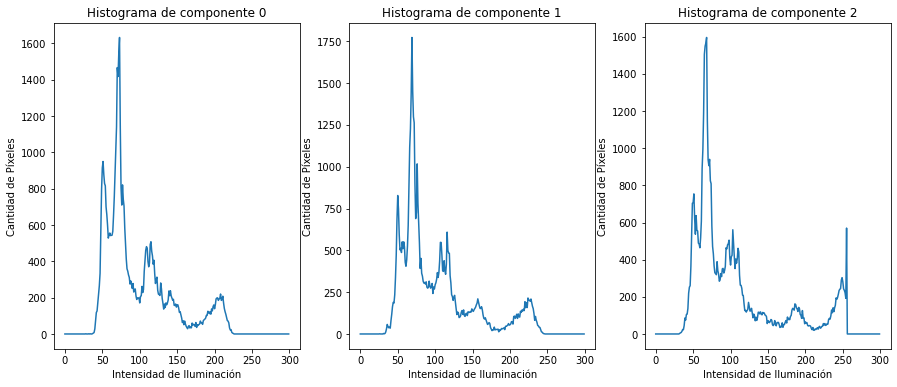

In [146]:
#Veamos en qué rango se encuentran sus píxeles
plt.figure(figsize=[15,6])

hist = cv2.calcHist([gt_verde],[0],None,[300],[0,300])
hist1 = cv2.calcHist([gt_verde],[1],None,[300],[0,300])
hist2 = cv2.calcHist([gt_verde],[2],None,[300],[0,300])

plt.subplot(1,3,1), plt. plot(hist),plt.title("Histograma de componente 0")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.subplot(1,3,2), plt. plot(hist1),plt.title("Histograma de componente 1")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.subplot(1,3,3), plt. plot(hist2),plt.title("Histograma de componente 2")

plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.show()

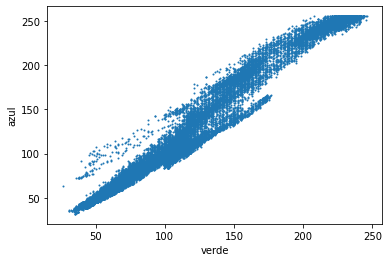

In [147]:
#Veamos la distribución de los píxeles en sus componentes en un scatter y en un plot 3D
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

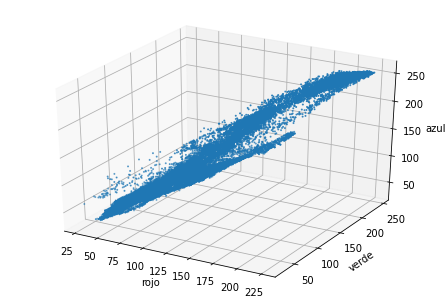

In [149]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

In [219]:
#Procedemos a etiquetar nuestra imágen con guante verde

showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_verde, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (94, 75, 50, 54)
(columna, fila, anchocol, anchofila)


In [220]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_verde, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI2: (21, 26, 32, 94)
(columna, fila, anchocol, anchofila)


In [221]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", g_verde, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI3: (134, 3, 31, 6)
(columna, fila, anchocol, anchofila)


In [222]:
rois=[roi1,roi2,roi3]

In [223]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=gt_verde[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

import pandas as pd
df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()


5894
(5894, 5)
Base de pixeles etiquetados:


,pixel_id,rojo,verde,azul,etiqueta
0,16594,89,97,100,1
1,16595,86,94,96,1
2,16596,82,91,90,1
3,16597,79,88,85,1
4,16598,77,86,83,1


cantidad de muestras etiquetadas: 5894
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


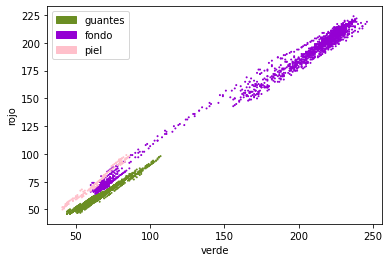

In [224]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='guantes')
patch2 = mpatches.Patch(color=colores[1], label='fondo')
patch3 = mpatches.Patch(color=colores[2], label='piel')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

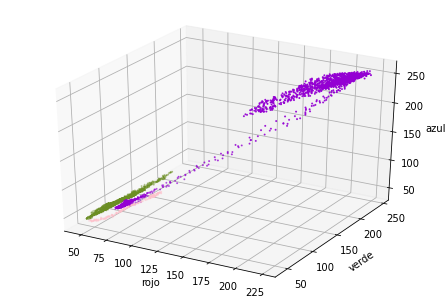

In [225]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0    74     72    73         0
1         1    72     70    71         0
2         2    70     69    67         0
3         3    68     67    65         0
4         4    66     65    63         0
49106
55000
proporción de datos etiqueados: 0.10716363636363636


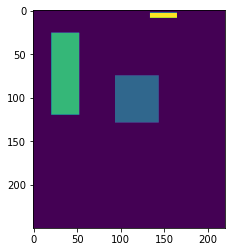

In [226]:
a=gt_verde.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)


In [227]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 1.00


(250, 220, 3)
[1]


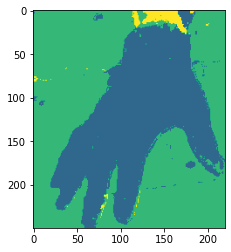

In [228]:
a=gt_verde.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([gt_verde[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)

In [229]:
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)        

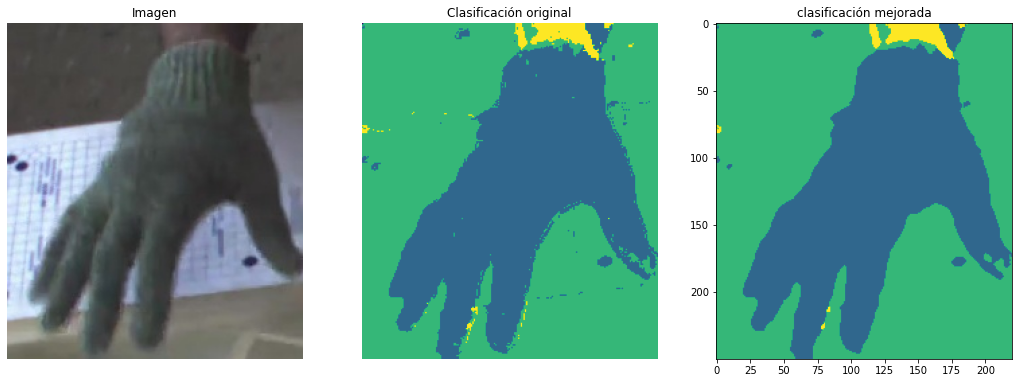

In [230]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(gt_verde)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

Depende mucho de como tomemos las regiones de interés la clasificación. El fondo se tomó de manera que abarque la hoja blanca y la mesa para que el algoritmo detecte a esas dos cosas como fondo. El guante tiene algunos píxeles oscuros que se pueden confundir con los píxeles oscuros de la piel.

* **Ahora para las imágenes de las manos**

In [238]:
mano=cv2.imread('T_G_Mostrando_Mano-Verde_38_double_box1.jpg')
im_mano=mano.copy()
im_mano[:,:,[2,1,0]]=mano #cv2 lee en orden BGR'
print('dimensiones de la imagen: ', im_mano.shape, 'es decir: ', im_mano.shape[0],'x',gt_verde.shape[1],' pixeles RGB')
print('tipo de datos: ', im_mano.dtype)
cv2.imshow('pulse una tecla aqui para seguir',mano)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

dimensiones de la imagen:  (142, 141, 3) es decir:  142 x 220  pixeles RGB
tipo de datos:  uint8


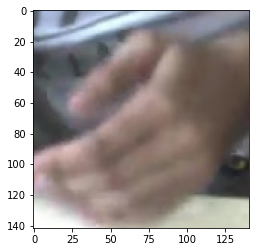

In [239]:
plt.imshow(im_mano)
plt.show()

In [240]:
dims=im_mano.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=im_mano[f,c,:]
        
import pandas as pd
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (20022, 4)


,pixel_id,rojo,verde,azul
0,0,85,95,104
1,1,87,97,107
2,2,90,102,116
3,3,104,117,134
4,4,127,139,161


In [241]:
df.describe()

,pixel_id,rojo,verde,azul
count,20022.000000,20022.000000,20022.000000,20022.000000
mean,10010.500000,133.733943,123.307212,121.143892
std,5779.997881,42.768826,43.825411,46.460087
min,0.000000,29.000000,29.000000,25.000000
25%,5005.250000,102.000000,92.000000,88.000000
50%,10010.500000,132.000000,116.000000,112.000000
75%,15015.750000,163.000000,147.000000,148.000000
max,20021.000000,255.000000,255.000000,255.000000


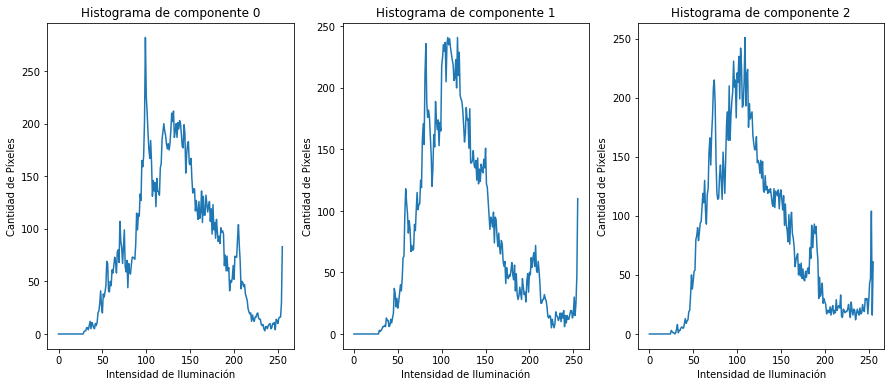

In [243]:
#Veamos en qué rango se encuentran sus píxeles
plt.figure(figsize=[15,6])

hist = cv2.calcHist([im_mano],[0],None,[256],[0,256])
hist1 = cv2.calcHist([im_mano],[1],None,[256],[0,256])
hist2 = cv2.calcHist([im_mano],[2],None,[256],[0,256])

plt.subplot(1,3,1), plt. plot(hist),plt.title("Histograma de componente 0")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.subplot(1,3,2), plt. plot(hist1),plt.title("Histograma de componente 1")
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.subplot(1,3,3), plt. plot(hist2),plt.title("Histograma de componente 2")

plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")

plt.show()

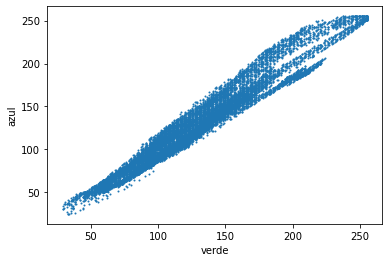

In [244]:
#Veamos la distribución de los píxeles en sus componentes en un scatter y en un plot 3D
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

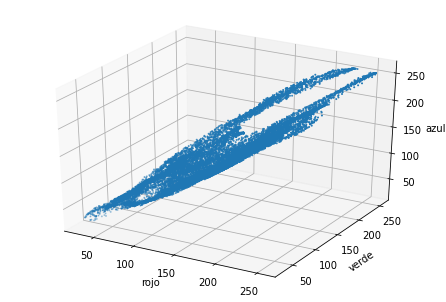

In [245]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

In [358]:
#Procedemos a etiquetar nuestra imágen sin guantes

showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", mano, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (8, 97, 93, 17)
(columna, fila, anchocol, anchofila)


In [359]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", mano, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI2: (2, 5, 39, 25)
(columna, fila, anchocol, anchofila)


In [360]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI(con pasto) con mouse +ent+tecla", mano, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI3: (2, 132, 24, 10)
(columna, fila, anchocol, anchofila)


In [361]:
rois=[roi1,roi2,roi3]

In [362]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=im_mano[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

import pandas as pd
df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()


2796
(2796, 5)
Base de pixeles etiquetados:


,pixel_id,rojo,verde,azul,etiqueta
0,13685,206,174,177,1
1,13686,203,172,170,1
2,13687,199,168,165,1
3,13688,193,162,159,1
4,13689,186,155,150,1


cantidad de muestras etiquetadas: 2796
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


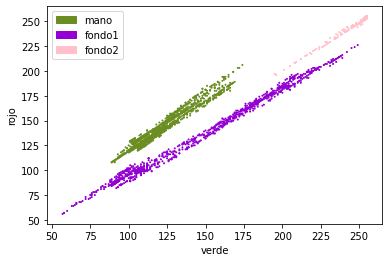

In [363]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='mano')
patch2 = mpatches.Patch(color=colores[1], label='fondo1')
patch3 = mpatches.Patch(color=colores[2], label='fondo2')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

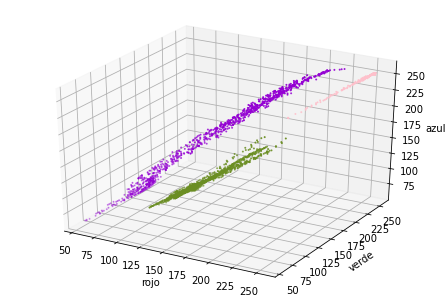

In [364]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0    85     95   104         0
1         1    87     97   107         0
2         2    90    102   116         0
3         3   104    117   134         0
4         4   127    139   161         0
17226
20022
proporción de datos etiqueados: 0.13964638897213066


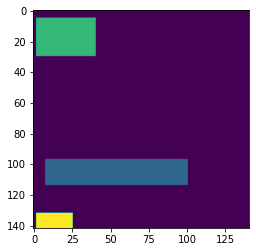

In [365]:
#Etiquetado completo
a=im_mano.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)


In [366]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 1.00


(142, 141, 3)
[2]


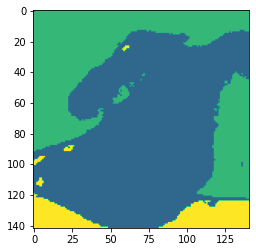

In [367]:
a=im_mano.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([im_mano[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)

In [368]:
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)       

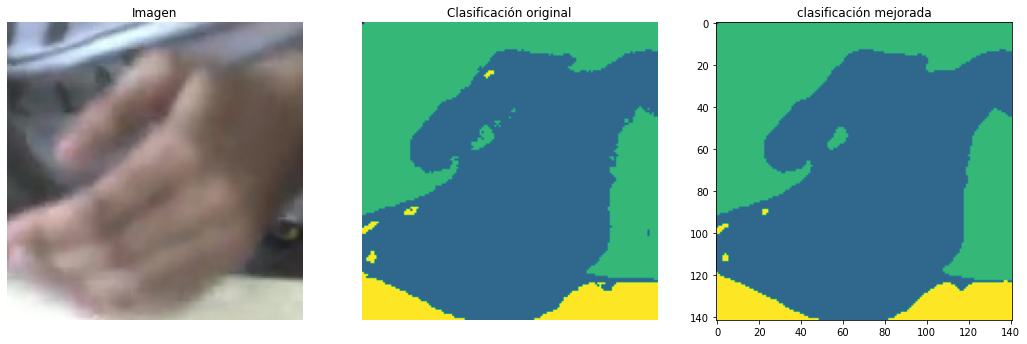

In [369]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(im_mano)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

Podemos ver que cunado incluimos los píxeles más brillantes de cada región el algoritmo detecta los detecta mejor (fondo, mesa y mano). De todos  modos, el comportamiento de tener que ver qué zona elegir puede ser debido al sobreajuste que tienen los datos de entrenamiento.

Vemos que todos los k vecinos producen un sobreajuste en los datos de entrenamiento y siempre se tendrá el mismo comportamiento, por lo que no vale mucho la pena probar con los loop para encontrar donde dos modelos de k vecinos coinciden en sus predicciones.